In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
data = pd.read_csv('Live1.csv')
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


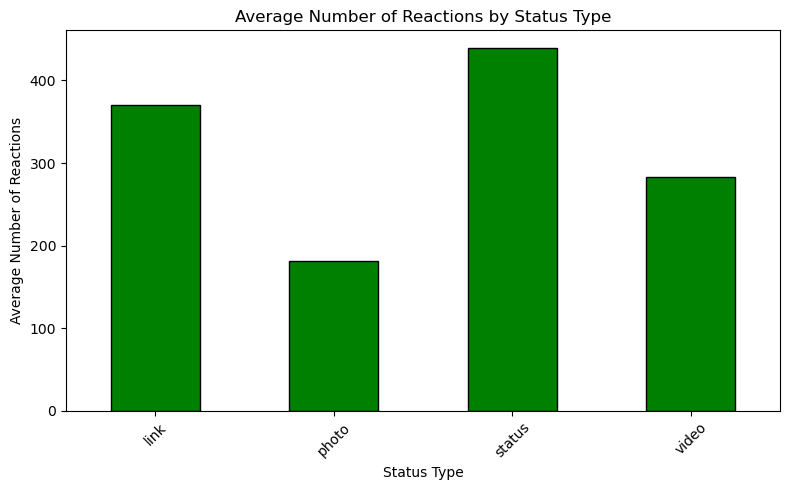

In [8]:
def plot_bar_chart(data):
    avg_reactions = data.groupby('status_type')['num_reactions'].mean()
    plt.figure(figsize=(8, 5))
    avg_reactions.plot(kind='bar', color='green', edgecolor='black')
    plt.title('Average Number of Reactions by Status Type')
    plt.xlabel('Status Type')
    plt.ylabel('Average Number of Reactions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_bar_chart(data)

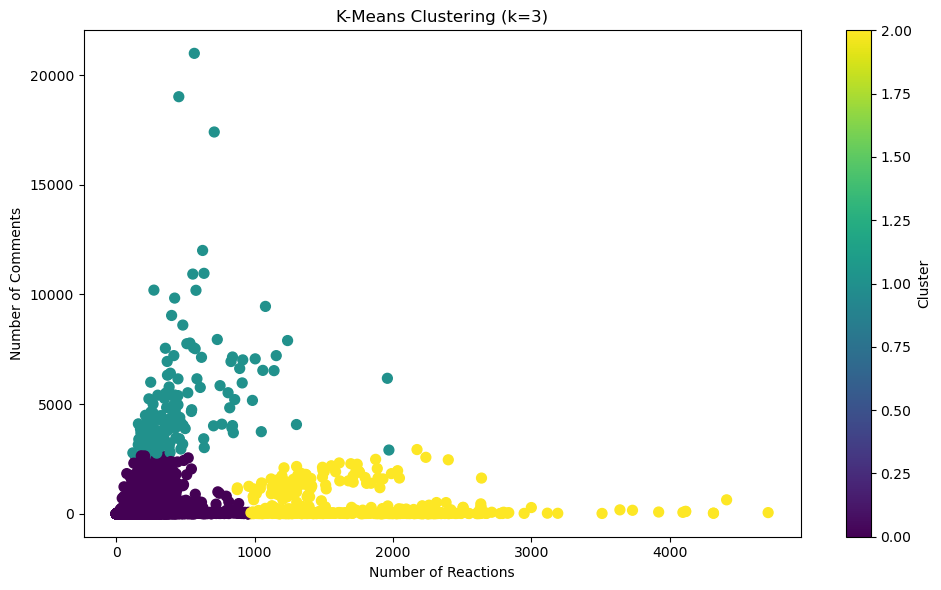

In [10]:
def perform_kmeans_clustering(data, n_clusters=3):
    features = data[['num_reactions', 'num_comments', 'num_shares']].dropna()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['cluster'] = kmeans.fit_predict(features)
    plt.figure(figsize=(10, 6))
    plt.scatter(data['num_reactions'], data['num_comments'], c=data['cluster'], cmap='viridis', s=50)
    plt.title(f'K-Means Clustering (k={n_clusters})')
    plt.xlabel('Number of Reactions')
    plt.ylabel('Number of Comments')
    plt.colorbar(label='Cluster')
    plt.tight_layout()
    plt.show()
perform_kmeans_clustering(data, n_clusters=3)

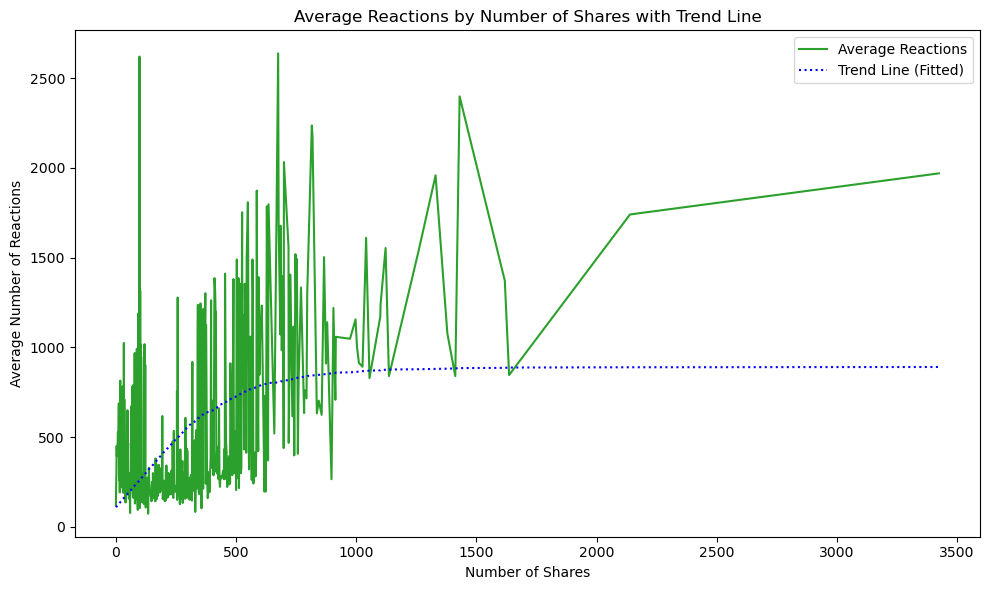

In [12]:
def line_plot_fitting(data):
    if 'num_reactions' not in data.columns or 'num_shares' not in data.columns:
        raise ValueError("The dataset must contain 'num_reactions' and 'num_shares' columns.")
    grouped_data = data.groupby('num_shares')['num_reactions'].mean()
    X = np.array(range(len(grouped_data))).reshape(-1, 1)
    y = grouped_data.values
    model = LinearRegression()
    model.fit(X, y)
    trend_line = model.predict(X)
    plt.figure(figsize=(10, 6))
    plt.plot(grouped_data.index, grouped_data.values, label='Average Reactions', color='tab:green')
    plt.plot(grouped_data.index, trend_line, label='Trend Line (Fitted)', color='blue', linestyle=':')
    plt.title('Average Reactions by Number of Shares with Trend Line')
    plt.xlabel('Number of Shares')
    plt.ylabel('Average Number of Reactions')
    plt.legend()
    plt.tight_layout()
    plt.show()
line_plot_fitting(data)

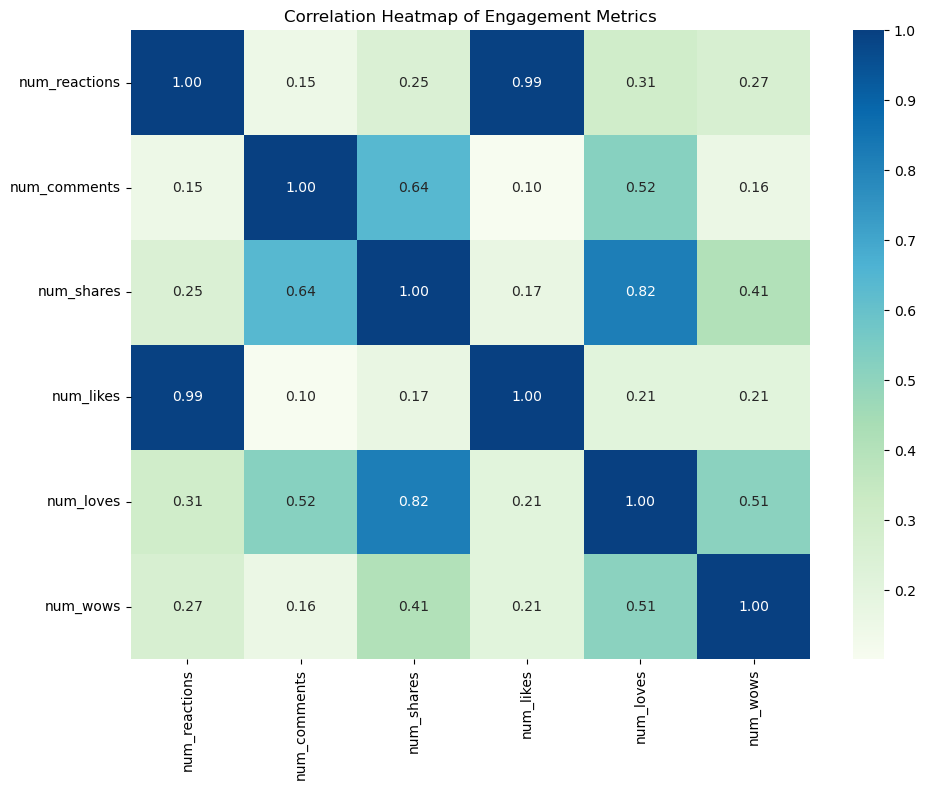

In [33]:
def plot_heatmap(data):
    engagement_metrics = data[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows']]
    correlation_matrix = engagement_metrics.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', fmt=".2f")
    plt.title('Correlation Heatmap of Engagement Metrics')
    plt.tight_layout()
    plt.show()
plot_heatmap(data)

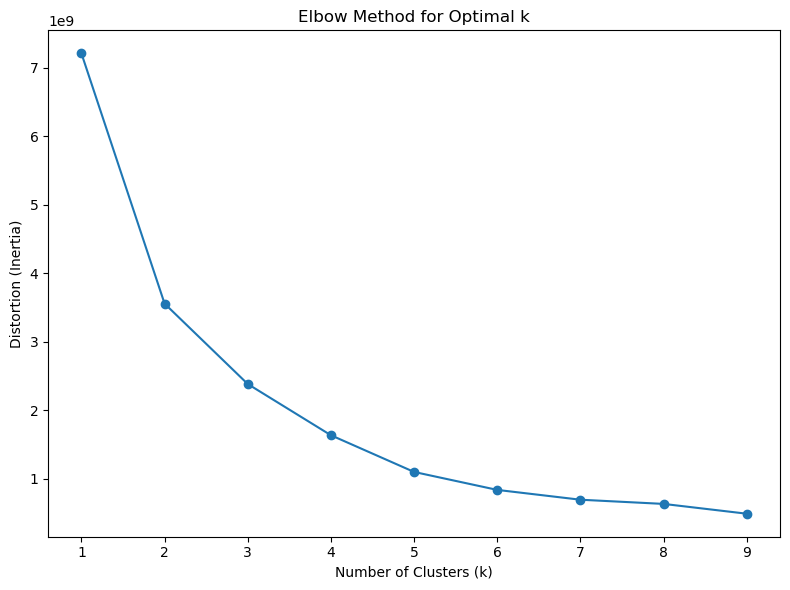

Silhouette Score for k=3: 0.7925655238082256


In [14]:
def plot_elbow_and_silhouette(data):
    features = data[['num_reactions', 'num_comments', 'num_shares']].dropna()
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.xticks(K)
    plt.tight_layout()
    plt.show()
    best_k = 3 
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    print(f'Silhouette Score for k={best_k}: {silhouette_avg}')
plot_elbow_and_silhouette(data)